<a href="https://colab.research.google.com/github/student-rabbit/advancedDataPractice/blob/main/statistics_code_Day_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !apt install texlive-fonts-recommended texlive-fonts-extra cm-super dvipng

In [ ]:
import math #math.xx
import random

import numpy as np #np.xx
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


# 1차원 데이터

## 평균

In [ ]:
X = np.array([45, 26, 57, 67, 40, 30, 55, 60, 95, 500])

# 공식대로 구하기
print(X.sum()/len(X))

# numpy 기능으로 바로 구하기
print(X.mean())

97.5
97.5


In [ ]:
# 이상치에 영향을 많이 받음
print(X[:-1].mean())

52.77777777777778


## 중앙값

In [ ]:
# 이상치에 영향 별로 없음
np.median(X)

56.0

In [ ]:
# 크기 순을 정렬해서 가운데 있는 값
# 데이터 개수가 짝수면 가운데 두값의 평균
X.sort()
X

array([ 26,  30,  40,  45,  55,  57,  60,  67,  95, 500])

## 분산

- score1과 score2는 평균이 똑같음

In [ ]:
np.random.seed(0)
scores1 = np.random.randint(30, 100, 10)
print(scores1)
print(scores1.mean())

[74 77 94 97 97 39 51 66 42 88]
72.5


In [ ]:
scores2 = np.random.randint(50, 90, 10)
print(scores2)
print(scores2.mean())

[51 88 89 73 74 67 87 75 63 58]
72.5


- 각 데이터에서 평균과의 차이를 구하고 이를 막대그래프로 표현

In [ ]:
deviations1 = scores1 - scores1.mean()
deviations1

array([  1.5,   4.5,  21.5,  24.5,  24.5, -33.5, -21.5,  -6.5, -30.5,
        15.5])

In [ ]:
deviations2 = scores2 - scores2.mean()
deviations2

array([-21.5,  15.5,  16.5,   0.5,   1.5,  -5.5,  14.5,   2.5,  -9.5,
       -14.5])

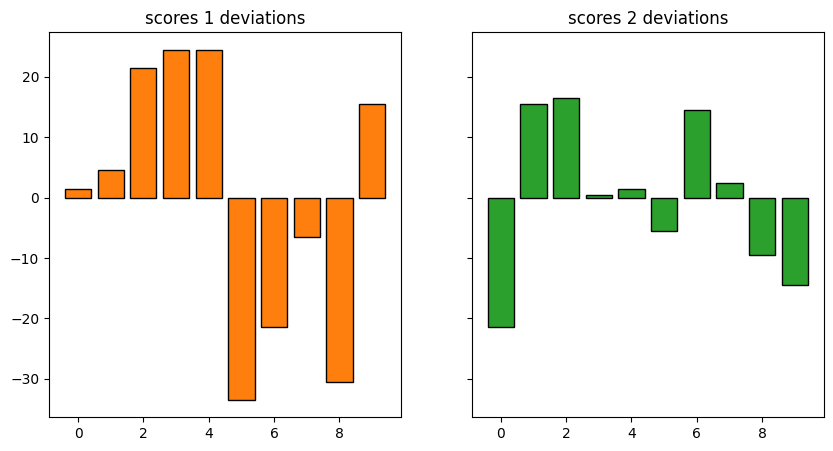

In [ ]:
fig, ax = plt.subplots(figsize=(10,5), nrows=1, ncols=2, sharey=True)

ax[0].bar(np.arange(10), deviations1, color='C1', edgecolor='k')
ax[0].set_title('scores 1 deviations')
ax[1].bar(np.arange(10), deviations2, color='C2', edgecolor='k')
ax[1].set_title('scores 2 deviations')
plt.show()

- 이 평균과의 차이값들을 평균해보면 0이 됨

In [ ]:
print(deviations1.sum() / len(deviations1))
print(deviations2.sum() / len(deviations2))

0.0
0.0


$$
\begin{aligned}
\frac{1}{n}\sum_{i=1}^n (x_i - \bar{x}) &= \frac{1}{n} \sum_{i=1}^n \left( x_i - \frac{1}{n} \sum_{i=1}^n x_i \right) \\
&=\frac{1}{n} \left\{ \sum_{i=1}^n x_i - \sum_{i=1}^n \left(\frac{1}{n} \sum_{i=1}^n x_i \right) \right\}\\
&= \frac{1}{n} \left( \sum_{i=1}^n x_i - n\bar{x} \right) \\
&= \frac{1}{n} \sum_{i=1}^n x_i - \bar{x}  = 0
\end{aligned}
$$

- 그래서 제곱하여 평균을 냄

In [ ]:
# 편차 제곱의 평균[+]
print((deviations1**2).mean())
print((deviations2**2).mean())

# numpy 기능으로 분산 바로 구하기 [+]
# ddof=0 이 디폴트, 즉  N으로 나눔
print(scores1.var())
print(scores2.var())

448.25
152.45
448.25
152.45


- 분산은 평균과의 편차값을 한변으로 하는 정사각형들의 평균 넓이

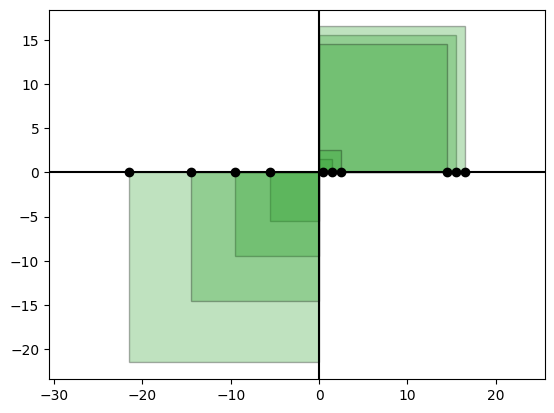

In [ ]:
from matplotlib.patches import Rectangle

fig = plt.figure(dpi=100)
ax = plt.axes()

#          0:-   1:+
colors = ['C1', 'C2']

covs = [ Rectangle( (0,0), x, x, edgecolor='k',
                   facecolor=colors[1], alpha=0.3)
            for x in deviations2 ]

for cov in covs:
    ax.add_patch(cov)

ax.plot(deviations2, np.zeros_like(deviations2), 'o', color='k')
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.axis('equal')
plt.show()

## 표준편차

- 분산이 제곱되어 구해진 값이므로 제곱근을 구해서 원래 데이터와 비슷한 지표로 만든 값

In [ ]:
# # 편차 제곱 평균의 양의 제곱근
print(np.sqrt((deviations1**2).mean()))
print(np.sqrt((deviations2**2).mean()))

# numpy 기능으로 표준편차 바로 구하기 [+]
print(scores1.std())
print(scores2.std())

21.17191535974013
12.34706442843804
21.17191535974013
12.34706442843804


### 표준편차를 사용한 이상치 탐지anomaly detection: 3 sigma rule

- 정의

- 경험적 규칙(empirical rule)
- 표준편차의 3배인 3*Sigma(σ)의 범위가 전체 Data의 99.7%를 포함
- UCL(Upper Control Limit) = mu + 3*sigma
- LCL(Lower Control Limit) = mu - 3*sigma

- 장단점
  - 구현과 이해가 쉽고 명확한 기준 설정 가능
  - 정규분포 가정 필요
  - 다변수 데이터에는 하나의 변수에 각각 적용해야 하므로 피쳐간 상호관계를 파악하기 어려움
  


In [ ]:
!gdown 1DAi1LRchE2xCb4zROLcwYTWQQ2BUiRv3

Downloading...
From: https://drive.google.com/uc?id=1DAi1LRchE2xCb4zROLcwYTWQQ2BUiRv3
To: /content/nba.csv
100% 1.84M/1.84M [00:00<00:00, 158MB/s]


In [ ]:
nba_df = pd.read_csv('nba.csv', index_col=0)

nba_df.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,27,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,24,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,58,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,9,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,10,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97


In [ ]:
nba_df = nba_df[nba_df['season'] == '2021-22']
nba_df = nba_df[['player_name', 'player_height', 'player_weight']].reset_index(drop=True)

nba_df.head()

,player_name,player_height,player_weight
0,Freddie Gillespie,205.74,111.130040
1,Georges Niang,200.66,104.326160
2,George King,198.12,99.790240
3,George Hill,193.04,85.275296
4,Gary Trent Jr.,195.58,94.800728


In [ ]:
# 평균과 표준편차
height_mean = nba_df['player_height'].mean()
height_std = nba_df['player_height'].std()

In [ ]:
# UCL, LCL 생성
ucl = height_mean + 3*height_std
lcl = height_mean - 3*height_std

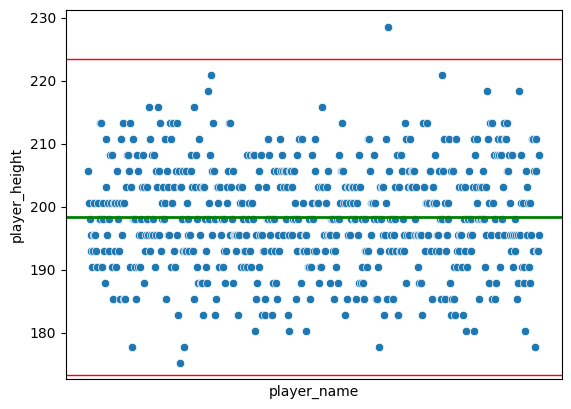

In [ ]:
sns.scatterplot(x=nba_df['player_name'], y=nba_df['player_height'])

plt.axhline(y=height_mean, color='g', linewidth=2)
plt.axhline(y=ucl, color='r', linewidth=1)
plt.axhline(y=lcl, color='r', linewidth=1)
plt.xticks([])

plt.show()

## 1차원 데이터의 시각화

### 히스토그램

In [ ]:
np.random.seed(0)
scores = np.abs((np.random.randn(500)*13)-65).astype(int)
scores[scores>=100] = 100
scores

array([ 42,  59,  52,  35,  40,  77,  52,  66,  66,  59,  63,  46,  55,
        63,  59,  60,  45,  67,  60,  76,  98,  56,  53,  74,  35,  83,
        64,  67,  45,  45,  62,  60,  76,  90,  69,  62,  49,  49,  70,
        68,  78,  83,  87,  39,  71,  70,  81,  54,  85,  67,  76,  59,
        71,  80,  65,  59,  64,  61,  73,  69,  73,  69,  75,  87,  62,
        70,  86,  58,  76,  64,  55,  63,  50,  81,  59,  73,  76,  72,
        69,  64,  80,  53,  58,  84,  45,  40,  49,  67,  78,  51,  70,
        49,  62,  52,  60,  55,  64,  41,  63,  59,  40,  82,  81,  52,
        80,  39,  70,  74,  40,  45,  40,  53,  76,  40,  68,  54,  52,
        67,  57,  53,  60,  79,  61,  47,  74,  66,  70,  40,  56,  59,
        75,  57,  73,  64,  73,  56,  57,  67,  59,  79,  84,  59,  62,
        56,  34,  52,  76,  50,  82,  71,  65,  42,  74,  75,  66,  73,
        50,  79,  79,  70,  71,  39,  52,  63,  80,  54,  78,  85,  49,
        60,  53,  60,  53,  73,  78,  56,  75,  73,  70,  64,  6

In [ ]:
# 히스토그램[+]
hist, bins = np.histogram(scores, bins=10, range=(0,100))
hist, bins

(array([  0,   0,   1,  14,  40, 116, 141, 123,  50,  15]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]))

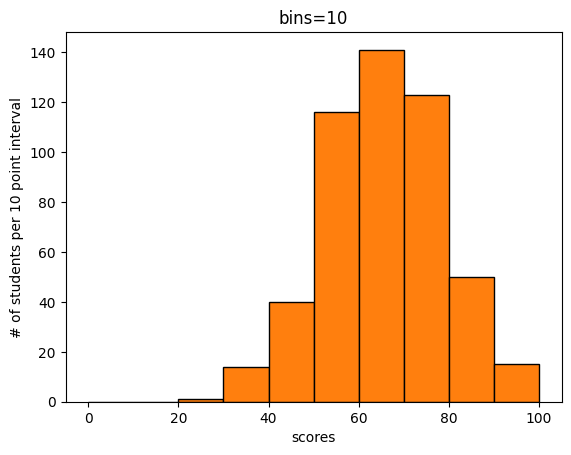

In [ ]:
# matplotlib
fig = plt.figure()
ax = plt.axes()

ax.hist(scores, bins=10, range=(0,100), color='C1', edgecolor='k')
ax.set_xlabel('scores')
ax.set_ylabel('# of students per 10 point interval')
ax.set_title('bins=10')
plt.show()

- 구간을 더 촘촘히 해서 그리면

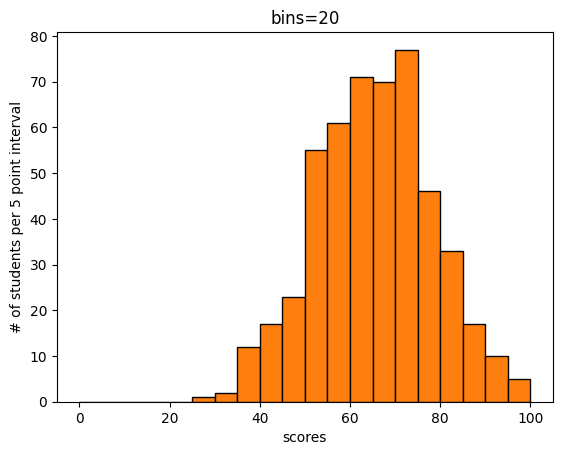

In [ ]:
fig = plt.figure()
ax = plt.axes()

ax.hist(scores, bins=20, range=(0,100), color='C1', edgecolor='k')
ax.set_title('bins=20')
ax.set_xlabel('scores')
ax.set_ylabel('# of students per 5 point interval')
plt.show()

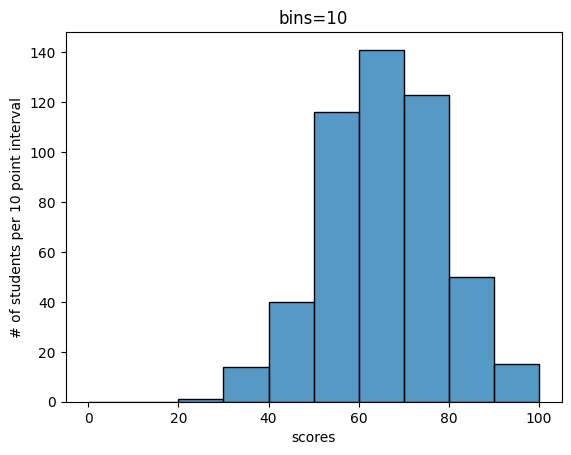

In [ ]:
# seaborn
sns.histplot(data=scores, bins=10, binrange=(0,100))
plt.title('bins=10')
plt.xlabel('scores')
plt.ylabel('# of students per 10 point interval')
plt.show()

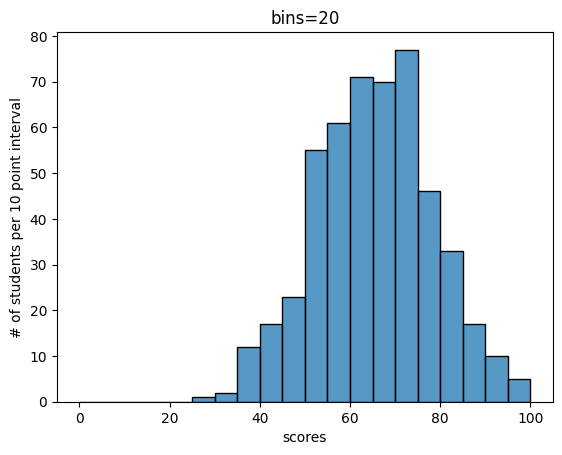

In [ ]:
# seaborn
sns.histplot(data=scores, bins=20, binrange=(0,100))
plt.title('bins=20')
plt.xlabel('scores')
plt.ylabel('# of students per 10 point interval')
plt.show()

### 상자그림

In [ ]:
D = np.array([1,2,3,4,5,6,7,8,9,10])

# 이 데이터는 이상치 존재
D = np.array([2,3,4,5,6,7,8,9,10,18,20])

- 전체 데이터에서 25%, 50%, 75%에 위치하는 값을 Q1, Q2, Q3으로 구함

- 이산 데이터를 줄세우고 25% 위치에 해당하는 값을 구할 때 깔끔하게 정수로 떨어지지 않게 되므로 `interpolation`이란 옵션으로 적당한 값을 선정

In [ ]:
Q1 = np.percentile(D, 25)
Q2 = np.percentile(D, 50)
Q3 = np.percentile(D, 75)

print(f"Q1={Q1}, Q2={Q2}, Q3={Q3}")

Q1=4.5, Q2=7.0, Q3=9.5


In [ ]:
# Q3과 Q1의 차이
IQR = Q3 - Q1
IQR

5.0

- 식 Q3 + 1.5*IQR 로 가상의 상위 울타리upper fence를 계산하고 그 펜스를 넘어가지 않는 데이터의 최대값을 찾음

In [ ]:
upper_fence = Q3 + 1.5*IQR
print(upper_fence)

upper_whisker = np.max(D[D <= upper_fence])
print(upper_whisker)

17.0
10


- Q1 - 1.5*IQR로 가상의 하위 울타리lower fence를 계산하고 그 펜스를 넘어가지 않는 데이터의 최소값을 찾음

In [ ]:
lower_fence = Q1 - 1.5*IQR
print(lower_fence)

lower_whisker = np.min(D[D >= lower_fence])
print(lower_whisker)

-3.0
2


- matplotlib에서 상자그림을 그림

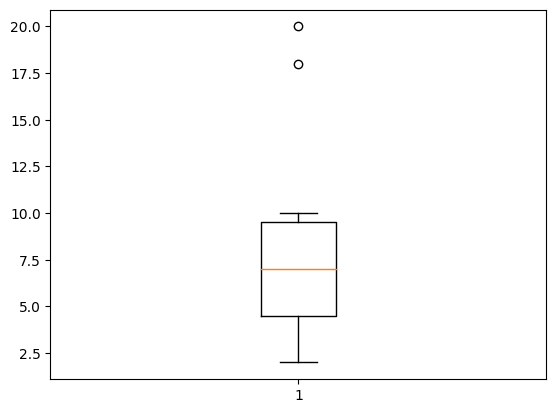

In [ ]:
fig = plt.figure(dpi=100)
ax = plt.axes()

box = ax.boxplot(D)

plt.show()

- 그려진 상자그림에서 계산된 값들이 미리 계산한 값들과 일치하는가?

In [ ]:
# 위 그림에서 whisker, box의 실제 변이 그려진 좌표를 조사
print("upper whisker", box['caps'][1].get_xydata()[0,1])
print("Q3", box['boxes'][0].get_xydata()[2,1])
print("Q2", box['medians'][0].get_xydata()[0,1])
print("Q1", box['boxes'][0].get_xydata()[0,1])
print("lower whisker", box['caps'][0].get_xydata()[0,1])

upper whisker 10.0
Q3 9.5
Q2 7.0
Q1 4.5
lower whisker 2.0


In [ ]:
# 이상치
box['fliers'][0].get_ydata()

array([18, 20])

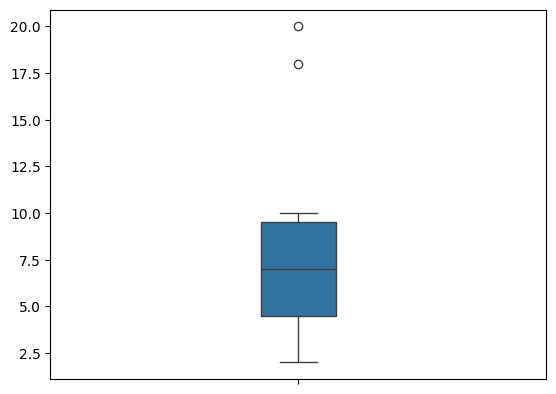

In [ ]:
# seaborn
sns.boxplot(data=D, width=0.15)
plt.show()

#### 상자 그림을 이용한 이상치 탐지

In [ ]:
nba_df.head()

,player_name,player_height,player_weight
0,Freddie Gillespie,205.74,111.130040
1,Georges Niang,200.66,104.326160
2,George King,198.12,99.790240
3,George Hill,193.04,85.275296
4,Gary Trent Jr.,195.58,94.800728


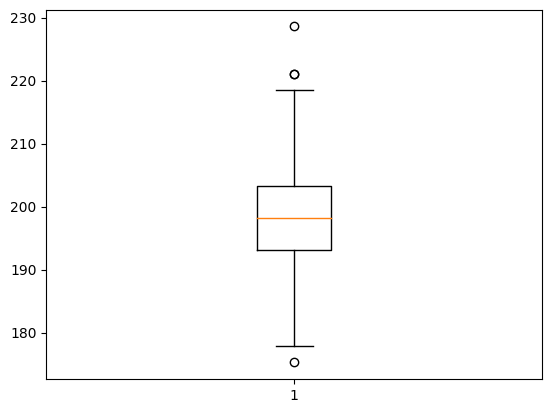

In [ ]:
fig = plt.figure(dpi=100)
ax = plt.axes()

box = ax.boxplot(nba_df['player_height'])
plt.show()

In [ ]:
# 위 그림에서 whisker, box의 실제 변이 그려진 좌표를 조사
print("upper whisker", box['caps'][1].get_xydata()[0,1])
print("Q3", box['boxes'][0].get_xydata()[2,1])
print("Q2", box['medians'][0].get_xydata()[0,1])
print("Q1", box['boxes'][0].get_xydata()[0,1])
print("lower whisker", box['caps'][0].get_xydata()[0,1])

upper whisker 218.44
Q3 203.2
Q2 198.12
Q1 193.04
lower whisker 177.8


In [ ]:
upper_whisker = box['caps'][1].get_xydata()[0,1]
lower_whisker = box['caps'][0].get_xydata()[0,1]

upper_outliers = []
lower_outliers = []

for outlier in box['fliers'][0].get_ydata():
    if outlier > upper_whisker:
        upper_outliers.append(outlier)
    else:
        lower_outliers.append(outlier)


print(upper_outliers)
print(lower_outliers)

[220.98, 228.6, 220.98]
[175.26]


# 2차원 데이터

In [ ]:
# 키
H = np.array([170, 155, 175, 182, 171, 188, 165, 167, 175, 183])
# 몸무게
W = np.array([ 65,  59,  68,  78,  62,  85,  63,  58,  70,  98])

# 신체 정보
X = np.array([H, W])
X

array([[170, 155, 175, 182, 171, 188, 165, 167, 175, 183],
       [ 65,  59,  68,  78,  62,  85,  63,  58,  70,  98]])

- 다차원 데이터의 행렬은 항상 (N, D)

In [ ]:
X = X.T
X

array([[170,  65],
       [155,  59],
       [175,  68],
       [182,  78],
       [171,  62],
       [188,  85],
       [165,  63],
       [167,  58],
       [175,  70],
       [183,  98]])

## 평균과 분산

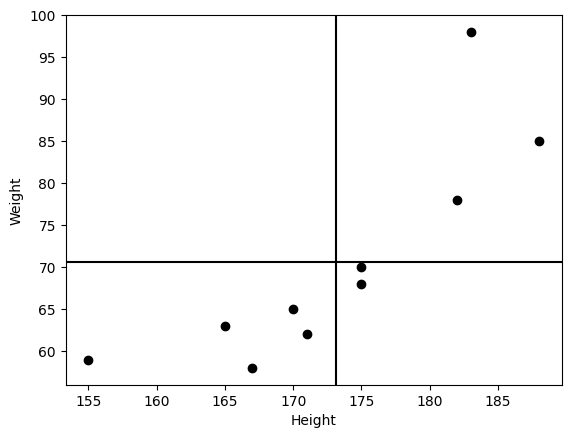

In [ ]:
fig = plt.figure(dpi=100)
ax = plt.axes()

ax.plot(X[:,0], X[:,1], 'o', color='k')

# 두 데이터의 평균선 그림
ax.axhline(y=X[:,1].mean(), color='k')
ax.axvline(x=X[:,0].mean(), color='k')

ax.set_xlabel('Height')
ax.set_ylabel('Weight')

plt.show()

- 앞서 알아본 통계값인 평균, 분산은 각 데이터 마다 계산 가능

In [ ]:
print("키 평균: ", X[:,0].mean())
print("몸무게 평균: ", X[:,1].mean())

print("키 분산: ", X[:,0].var())
print("몸무게 분산: ", X[:,1].var())

키 평균:  173.1
몸무게 평균:  70.6
키 분산:  85.09
몸무게 분산:  147.64000000000001


## 공분산

- 두 데이터 사이의 관계를 나타내는 분산값을 계산

- 공분산의 의미는 두 데이터의 평균값 두개로 계산되는 각각의 편차를 가로변, 세로변으로 하는 직사각형의 평균 넓이

- 여기서는 음의 넓이도 존재

- 아래 그림에서 2사분면, 4사분면에 있는 데이터들이 음의 면적에 해당

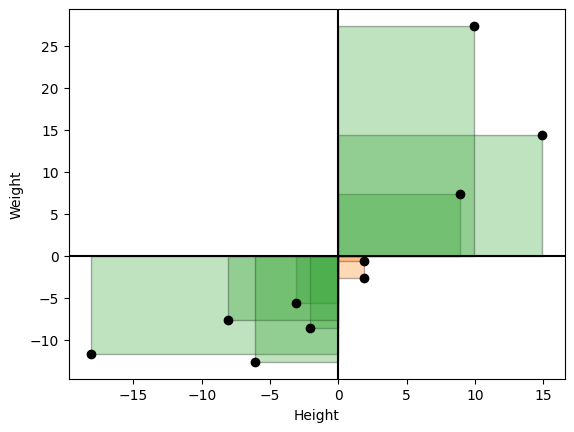

In [ ]:
# 공분산의 그림 표현
# :                +------------------+
# :                |                  |
# :              height               |
# :                |                  |
# :               (xy)---- width -----+
# (xy, w, h)
from matplotlib.patches import Rectangle

fig = plt.figure(dpi=100)
ax = plt.axes()

X_bar = X.mean(axis=0)
# 평균을 뺀 편차
X_tilde = X - X_bar

#          0:-   1:+
colors = ['C1', 'C2']

covs = [ Rectangle( (0,0), x[0], x[1], edgecolor='k',
                   facecolor=colors[((x[0]*x[1])>0).astype(int)], alpha=0.3)
            for x in X_tilde ]

for cov in covs:
    ax.add_patch(cov)
ax.plot(X_tilde[:,0], X_tilde[:,1], 'o', color='k')
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.set_xlabel('Height')
ax.set_ylabel('Weight')

plt.show()

In [ ]:
# 공분산 직접 계산, X_tilde는 편차
np.sum(X_tilde[:,0] * X_tilde[:,1]) / (X_tilde.shape[0]-1)

103.26666666666668

In [ ]:
# 공분산행렬, default ddof=1
np.cov(X[:,0], X[:,1], ddof=1)

array([[ 94.54444444, 103.26666667],
       [103.26666667, 164.04444444]])

In [ ]:
# 판다스로도 동일한 결과를 얻을 수 있음
pd.DataFrame(X).cov()

,0,1
0,94.544444,103.266667
1,103.266667,164.044444


## 상관계수

In [ ]:
# 위 데이터의 상관계수
np.corrcoef(X.T)

array([[1.      , 0.829204],
       [0.829204, 1.      ]])

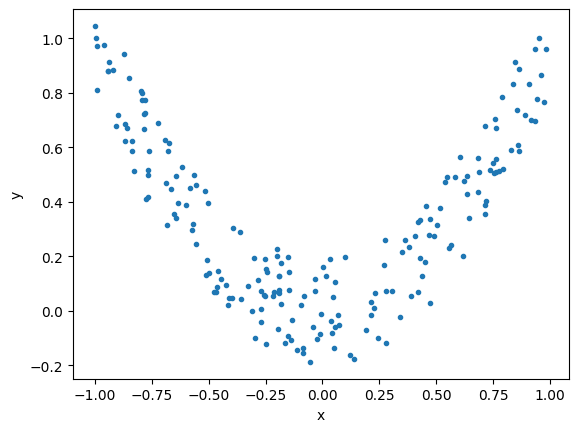

In [ ]:
# 직선의 상관성이 없는 데이터, 무상관이지만 독립은 아님, 독립이면 무상관

x = np.random.uniform(-1, 1, 200)
X_uncorr = np.array( [x, x**2 + np.random.uniform(-0.2, 0.2, 200)]).T

fig = plt.figure()
ax = plt.axes()

ax.plot(X_uncorr[:,0], X_uncorr[:,1], '.')
ax.set_xlabel('x')
ax.set_ylabel('y')

plt.show()

In [ ]:
# 상관계수가 매우 작게 계산
print(np.corrcoef(X_uncorr.T))


[[ 1.         -0.02566704]
 [-0.02566704  1.        ]]


## 2차원 데이터의 시각화

### 산점도

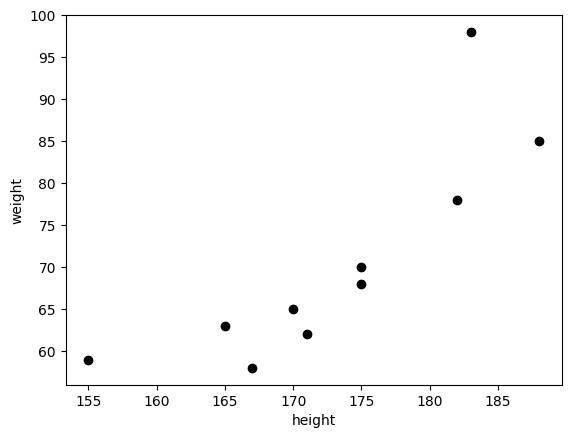

In [ ]:
# matplotlib

fig = plt.figure()
ax = plt.axes()

ax.plot(X[:,0], X[:,1], 'o', color='k')
ax.set_xlabel('height')
ax.set_ylabel('weight')

plt.show()

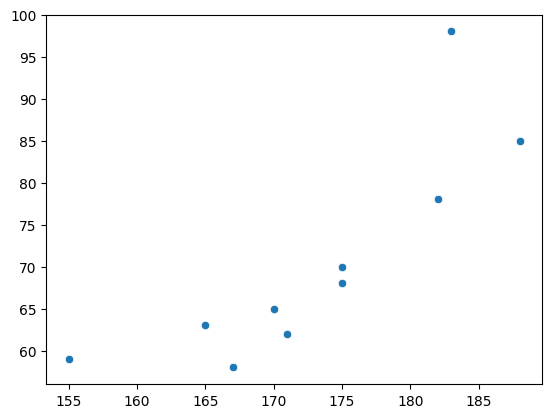

In [ ]:
# seaborn

sns.scatterplot(data=pd.DataFrame(X), x=X[:,0], y=X[:,1])
plt.show()

### 히트맵

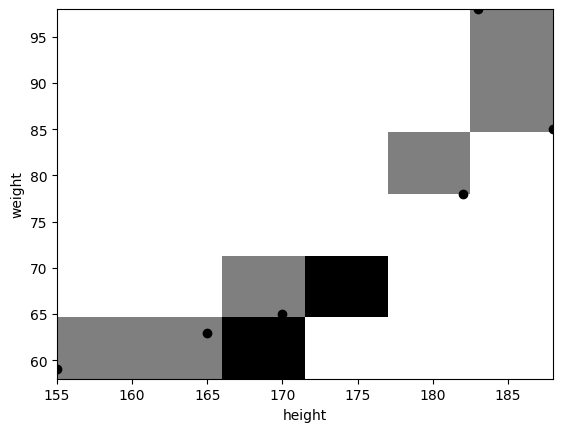

In [ ]:
# matplotlib으로 일종의 2d 히스토그램
fig = plt.figure()
ax = plt.axes()

ax.hist2d(X[:,0], X[:,1], bins=(6,6), cmap='binary')
ax.plot(X[:,0], X[:,1], 'o', color='k')
ax.set_xlabel('height')
ax.set_ylabel('weight')

plt.show()

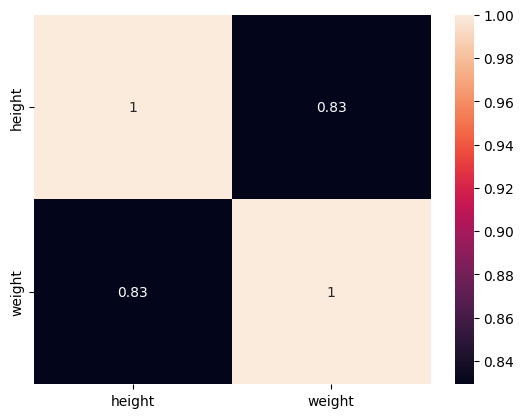

In [ ]:
# seaboarn으로 상관 관계를 히트맵으로
sns.heatmap(np.corrcoef(X.T),
            xticklabels=['height', 'weight'],
            yticklabels=['height', 'weight'],
            annot=True)

plt.show()

#### 히트맵을 이용한 상관관계 분석

In [ ]:
!gdown 1z6WApewnOkuzx3J7esyqeNH6G-tQQ59w

Downloading...
From: https://drive.google.com/uc?id=1z6WApewnOkuzx3J7esyqeNH6G-tQQ59w
To: /content/auto-mpg.data-original
100% 32.1k/32.1k [00:00<00:00, 49.8MB/s]


In [ ]:
col_names = ['mpg','cylinders','displacement','horsepower',
             'weight','acceleration','model year','origin','car name']

In [ ]:
df_origin = pd.read_csv('auto-mpg.data-original',
                        sep="\s+", header=None, names=col_names)

df_origin.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


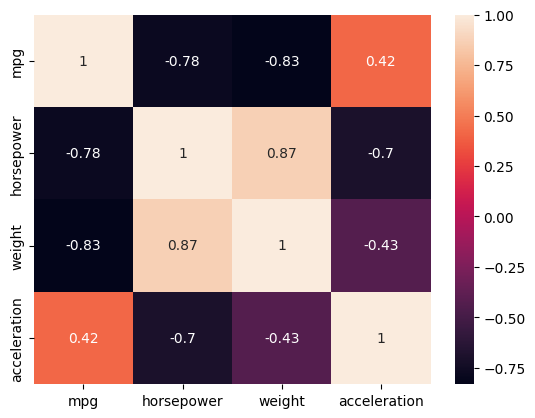

In [ ]:
# mpg, horsepower, weight, acceleration간의 상관계수 시각화
sns.heatmap(data=df_origin[['mpg', 'horsepower', 'weight', 'acceleration']].corr(),
            annot=True)
plt.show()

- `mpg`와 `horsepower`, `weight`은 강한 음의 상관관계: `horsepower`과 `weight`이 늘어나면 연비는 줄어든다

- `horsepower`와 `weight`사이에는 강한 양의 상관관계: `horsepower`가 증가하면 `weight`도 증가한다.

# 확률 시뮬레이션

- 주사위 던지기 시뮬레이션

In [ ]:
# 공평한 주사위
P = np.array([1/6, 1/6, 1/6, 1/6, 1/6, 1/6])

N = 1000000
samples = np.random.choice([1,2,3,4,5,6], N, p=P)

In [ ]:
# 샘플로 부터 구한 확률과 P를 비교
P_stat = np.array([ sum(samples == i) / N for i in range(1, 7) ])

In [ ]:
np.abs(P-P_stat)

array([8.56666667e-05, 4.57666667e-04, 2.51666667e-04, 3.73333333e-04,
       1.23333333e-04, 2.98333333e-04])

In [ ]:
# 공평하지 않은 주사위
P = np.array([1/6, 1/6, 1/6, 1/6, 3/15, 2/15])
print(sum(P))

N = 1000000
samples = np.random.choice([1,2,3,4,5,6], N, p=P)

1.0


In [ ]:
# 샘플로 부터 구한 확률과 P를 비교
P_stat = np.array([ sum(samples == i) / N for i in range(1, 7) ])
np.abs(P-P_stat)

array([3.29333333e-04, 3.65333333e-04, 1.04666667e-03, 1.07333333e-04,
       2.46000000e-04, 1.33333333e-06])

# 이산 확률변수

## 확률함수와 누적분포함수

- 각 주사위 눈에 다음처럼 확률이 할당된 불공정한 주사위

| 눈 | 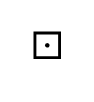 | 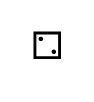 | 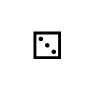 | 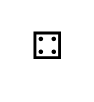 | 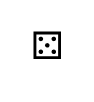 | 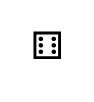 |
|:-------:|:-------:|:-------:|:-------:|:-------:|:-------:|:-------:|
| 확률   | $\dfrac{1}{21}$   | $\dfrac{2}{21}$   | $\dfrac{3}{21}$  |$\dfrac{4}{21}$  | $\dfrac{5}{21}$   | $\dfrac{6}{21}$   |

- 샘플을 입력으로 받고 숫자를 출력하는 확률 변수를 다음처럼 정의

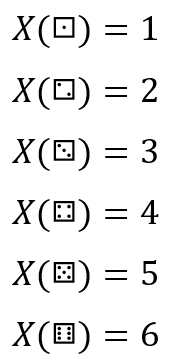



- 그러면 확률 변수 값과 확률의 대응 관계 테이블은 다음처럼 됨

| 눈수 | 1 | 2 | 3 | 4 | 5 | 6 |
|:-------:|:-------:|:-------:|:-------:|:-------:|:-------:|:-------:|
| 확률   | $\dfrac{1}{21}$   | $\dfrac{2}{21}$   | $\dfrac{3}{21}$  |$\dfrac{4}{21}$  | $\dfrac{5}{21}$   | $\dfrac{6}{21}$   |

- 확률 질량함수

$$
f_X(x) = \begin{cases}
\dfrac{x}{21} & x \in \{1,2,3,4,5,6\} \\[10pt]
0 & \mbox{otherwise }
\end{cases}
$$

In [ ]:
# 파이썬으로 확률 변수 정의
# 확률변수가 가질 수 있는 값(support), 일종의 정의역
x_set = np.array([1,2,3,4,5,6])

# 확률 질량 함수
def f_X(x):
    if x in x_set:
        return x / 21
    else:
        return 0

# 확률변수는 x_set과 f(x)로 정의
X = [x_set, f_X]

In [ ]:
# 각 확률 변수값에 대한 확률을 계산
f_X(0), f_X(1), f_X(2), f_X(3), f_X(4), f_X(5), f_X(6), f_X(7)

(0,
 0.047619047619047616,
 0.09523809523809523,
 0.14285714285714285,
 0.19047619047619047,
 0.23809523809523808,
 0.2857142857142857,
 0)

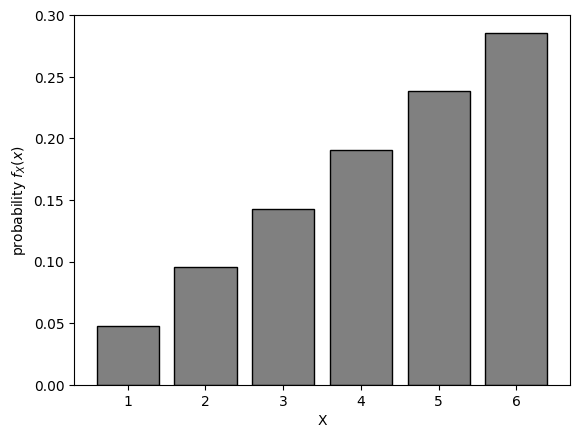

In [ ]:
# 모두 계산
prob = np.array([f_X(xi) for xi in x_set])

# 확률을 막대그래프로 표시
plt.bar(x_set, prob, color='gray', ec='k')
plt.xlabel('X')
plt.ylabel('probability ' + r'$f_X(x)$')
plt.show()

In [ ]:
# 확률의 성질 확인

# 모두 0 이상인가?
print( np.all(prob >= 0) ) # np.all() 모두 1이어야 결과는 1


# 더 더해서 1이 되나?
np.sum(prob)

True


0.9999999999999999

In [ ]:
# 누적 분포함수
def F(x):
    return np.sum([f_X(xi) for xi in x_set if xi <= x])

# 실수 전구간에 대해서 정의!!
F(-1), F(1), F(1.2), F(2), F(6), F(8)

(0.0,
 0.047619047619047616,
 0.047619047619047616,
 0.14285714285714285,
 0.9999999999999999,
 0.9999999999999999)

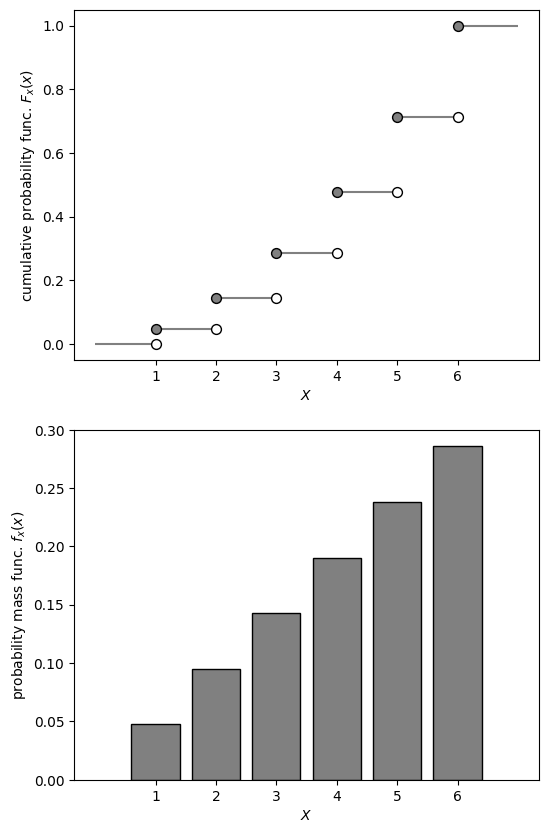

In [ ]:
# 그림
fig, ax = plt.subplots(figsize=(6, 10), nrows=2, ncols=1, sharex=True)

interval = [0] + list(x_set) + [7]
interval = [(interval[i], interval[i+1]) for i in range(len(interval)-1)]

cumprob = [0.] + [F(xi) for xi in x_set]

for i, unit in enumerate(interval):
    if i == 0:
        ax[0].hlines(0, unit[0], unit[1], color='gray')
        ax[0].scatter([unit[1]],[0], s=50, c='w', edgecolors='k', zorder=10)
    elif i == len(interval)-1:
        ax[0].hlines(1, unit[0], unit[1], color='gray')
        ax[0].scatter([unit[0]], [cumprob[i]], s=50, c='gray', edgecolors='k', zorder=10)
    else:
        ax[0].hlines(cumprob[i], unit[0], unit[1], color='gray')
        ax[0].scatter([unit[0]], [cumprob[i]], s=50, c='gray', edgecolors='k', zorder=10)
        if i <= len(interval)-2:
            ax[0].scatter([unit[1]], [cumprob[i]], s=50, c='w', edgecolors='k', zorder=10)

ax[0].set_xlabel(r'$X$')
ax[0].set_ylabel('cumulative probability func. ' + r'$F_x(x)$')
ax[0].set_xticks([1, 2, 3, 4, 5, 6])
ax[0].xaxis.set_tick_params(which='both', labelbottom=True)

# 모두 계산
prob = np.array([f_X(xi) for xi in x_set])

# 확률을 막대그래프로 표시
ax[1].bar(x_set, prob, color='gray', ec='k')

ax[1].set_xlabel(r'$X$')
ax[1].set_ylabel('probability mass func. ' + r'$f_x(x)$')
ax[1].set_xticks([1, 2, 3, 4, 5, 6])

plt.show()

## 기댓값

$$
\mathbb{E}[X] = \sum_{i} x_i f_X(x_i)
$$

- 앞서 정의한 확률변수의 기댓값





In [ ]:
# 확률변수 X의 이론적 기댓값
np.sum([xi * f_X(xi) for xi in x_set])

4.333333333333333

In [ ]:
# 시뮬레이션
sample = np.random.choice(x_set, 100000, p=prob) #  prob 위 막대그래프 그릴때 계산함
np.mean(sample)

4.3262

- 임의의 함수 $g()$로 변환된 확률변수의 기댓값

$$
\mathbb{E}[g(X)] = \sum_{i} g(x_i) f_{X}(x_i)
$$

- 로 정의하고 이 경우 앞서 구한 확률변수 $X$의 기댓값은 $g(X)=X$인 항등 함수인 경우

In [ ]:
# 1차원 확률변수의 기댓값
def E(X, g=lambda x: x):
    x_set, f_X = X
    return np.sum([g(xi)*f_X(xi) for xi in x_set])

In [ ]:
# Z = 2X + 1로 정의된 확률변수의 기댓값
E(X, lambda x: 2*x+1)

9.666666666666666

## 분산

$$
Var[X] = \sum_i (x_i - \mathbb{E}[X])^2 f_X(x_i)
$$

- 임의의 함수 $g()$로 변환된 확률변수의 분산

$$
Var[g(X)] = \sum_i (g(x_i)-\mathbb{E}[g(X)])^2 f_{X}(x_i)
$$



In [ ]:
# 분산의 계산
m = E(X)
np.sum([(xi-m)**2 * f_X(xi) for xi in x_set])

2.2222222222222223

In [ ]:
# 1차원 확률변수의 분산
def Var(X, g=lambda x: x):
    x_set, f_X = X
    m = E(X, g)
    return np.sum([(g(xi)-m)**2 * f_X(xi) for xi in x_set])

In [ ]:
Var(X), Var(X, lambda x: 2*x+3)

(2.2222222222222223, 8.88888888888889)

## 예제 2: 불량품 시뮬레이션

A공장 60%, B공장 30%, C공장 10% 생산에 불량률은 각 1%, 2%, 3%일 때 차를 샀을 때 불량이 걸릴 확률을 계산하시오.

$$
P(A) = \frac{60}{100}, \quad P(B)=\frac{30}{100}, \quad P(C)=\frac{10}{100}
$$

$$
P(D \mid A) = \frac{1}{100}, \quad P(D \mid B)=\frac{2}{100}, \quad P(D \mid C)=\frac{3}{100}
$$


In [ ]:
factories = ['A', 'B', 'C']
defective_rate = {'A':(0.99, 0.01), 'B':(0.98,0.02), 'C':(0.97,0.03)}

# 시뮬레이션 할 자동차의 대수
N = 1_000_000

# 공장을 무작위로 선택
fs = random.choices(factories, weights=(0.6, 0.3, 0.1), k=N)

# 각 공장에서 생산된 자동차를 시뮬레이션
# 각 자동차는 (생산공장, pass or fail) 인 튜플로 표시
cars = [
    ( f,
      # 공장 f에 대한 pass, fail 선택
      random.choices(['pass', 'fail'], defective_rate[f])[0] ) for f in fs
]

In [ ]:
# 시뮬레이션된 자동차를 하나씩 검사하면서
# 양품, 불량을 기록

fail = 0 # 전체 불량수

A = 0 # A 공장에서 생산된 자동차 수
A_fail = 0 # A 공장에서 생산된 자동차 중 불량 수

B = 0
B_fail = 0

C = 0
C_fail = 0

for car in cars:
    if car[0] == 'A':
        A += 1
        if car[1] == 'fail':
            A_fail += 1
            fail += 1

    elif car[0] == 'B':
        B += 1
        if car[1] == 'fail':
            B_fail += 1
            fail += 1
    else:
        C += 1
        if car[1] == 'fail':
            C_fail += 1
            fail += 1


print(f"P(A)={A/N:.4f}, P(D|A)={A_fail/A:.4f}")
print(f"P(B)={B/N:.4f}, P(D|B)={B_fail/B:.4f}")
print(f"P(C)={C/N:.4f}, P(D|C)={C_fail/C:.4f}")
print(f"P(D)={fail/N:.4f}")

P(A)=0.5996, P(D|A)=0.0101
P(B)=0.3003, P(D|B)=0.0203
P(C)=0.1001, P(D|C)=0.0294
P(D)=0.0151


# 대표적인 확률분포

## 이산 확률분포

### 베르누이 분포 Bernoulli Distribution

In [ ]:
####################################################
# 확률변수 정의

from scipy.stats import bernoulli

mu = 0.25
bern_rv = bernoulli(mu)

In [ ]:
####################################################
# 확률 질량함수, pmf()

bern_rv.pmf(0), bern_rv.pmf(1)

(0.75, 0.25)

P(X=1)=0.25,         P(X=0)=0.75


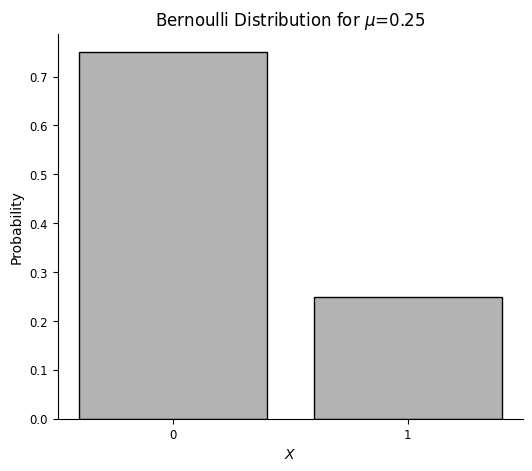

In [ ]:
####################################################
# 확률질량함수 그림

print(f"P(X=1)={bern_rv.pmf(1)}, \
        P(X=0)={bern_rv.pmf(0)}")

fig = plt.figure(figsize=(6,5), dpi=100)
ax = plt.axes()

xticks = [0, 1]

ax.bar([0, 1], [bern_rv.pmf(0), bern_rv.pmf(1)], color='0.7', edgecolor='k')
ax.set_xticks(xticks)
ax.set_xlabel(r"$X$")
ax.set_ylabel("Probability")
ax.set_title(r"Bernoulli Distribution for $\mu$=0.25")

ax.tick_params(axis='x', labelsize="small")
ax.tick_params(axis='y', labelsize="small")

# axes의 right, top 축 감추기
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.show()

In [ ]:
####################################################
# 누적 분포 함수, 실수 전체에 대해 정의, cdf()

bern_rv.cdf(-1), bern_rv.cdf(0), bern_rv.cdf(0.5), bern_rv.cdf(1), bern_rv.cdf(2)

(0.0, 0.75, 0.75, 1.0, 1.0)

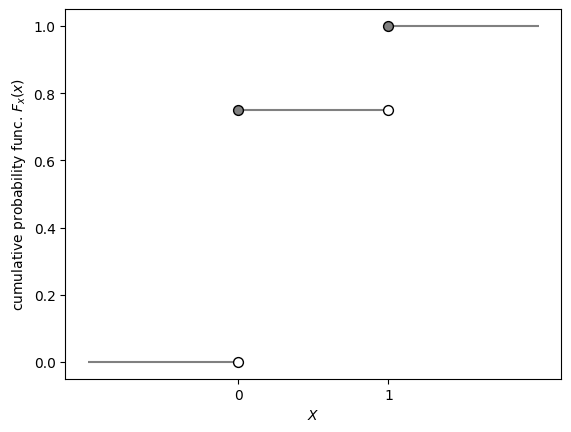

In [ ]:
####################################################
# 누적 분포 함수 그림

fig = plt.figure()
ax = plt.axes()

x_set = [0, 1]
interval = [-1] + x_set +[2]
interval = [(interval[i], interval[i+1]) for i in range(len(interval)-1)]
interval

cumprob = [0.] + [ bern_rv.cdf(xi) for xi in x_set ]
cumprob

for i, unit in enumerate(interval):
    if i == 0:
        ax.hlines(0, unit[0], unit[1], color='gray')
        ax.scatter([unit[1]],[0], s=50, c='w', edgecolors='k', zorder=10)
    elif i == len(interval)-1:
        ax.hlines(1, unit[0], unit[1], color='gray')
        ax.scatter([unit[0]], [cumprob[i]], s=50, c='gray', edgecolors='k', zorder=10)
    else:
        ax.hlines(cumprob[i], unit[0], unit[1], color='gray')
        ax.scatter([unit[0]], [cumprob[i]], s=50, c='gray', edgecolors='k', zorder=10)
        if i <= len(interval)-2:
            ax.scatter([unit[1]], [cumprob[i]], s=50, c='w', edgecolors='k', zorder=10)

ax.set_xlabel(r'$X$')
ax.set_ylabel('cumulative probability func. ' + r'$F_x(x)$')
ax.set_xticks(x_set)
ax.xaxis.set_tick_params(which='both', labelbottom=True)

In [ ]:
####################################################
# 특정 누적 확률에 해당하는 확률 변수 값 구하기, ppf()

# 실패 확률까지는 X=0, 실패확률을 초과하면 X=1로 대응
# [0,0.75]->0, (0.75,1]->1
print(bern_rv.ppf(0.75), bern_rv.ppf(0.751))

# bernoulli로 직접하려면 p값을 지정해야 함
# 실패확률까지는 X=0, 실패확률을 초과하면 X=1로 대응
# [0,0.75]->0, (0.75,1]->1
print(bernoulli.ppf(q=0.75, p=0.25), bernoulli.ppf(q=0.751, p=0.25))

0.0 1.0
0.0 1.0


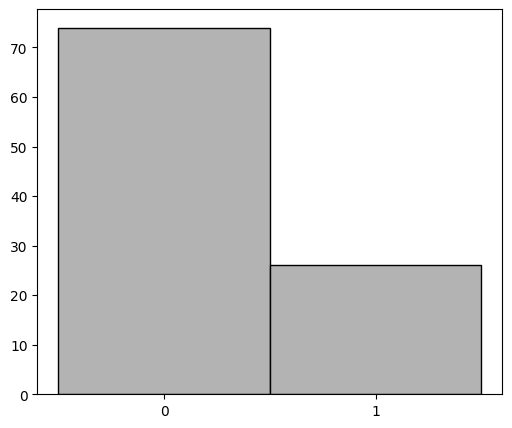

In [ ]:
####################################################
# 랜덤 샘플링 시뮬레이션

# 랜덤 샘플링[+]
samples = bern_rv.rvs(size=100, random_state=111)

fig = plt.figure(figsize=(6,5), dpi=100)
ax = plt.axes()

# 히스토그램[+]
ax.hist(samples, bins=range(3), density=False, color='0.7', edgecolor='k')

xticks = np.arange(2)+0.5
ax.set_xticks(xticks)
ax.set_xticklabels(['0', '1'])

plt.show()

## 연속 확률분포

### 정규분포 Normal (Gaussian) Distribution

In [ ]:
####################################################
# 확률변수 정의
from scipy.stats import norm

mu = 0
var = 1

normal_rv = norm(loc=mu, scale=np.sqrt( var ))

In [ ]:
####################################################
# 확률 밀도 함수

normal_rv.pdf(-1), normal_rv.pdf(0), normal_rv.pdf(1)

(0.24197072451914337, 0.3989422804014327, 0.24197072451914337)

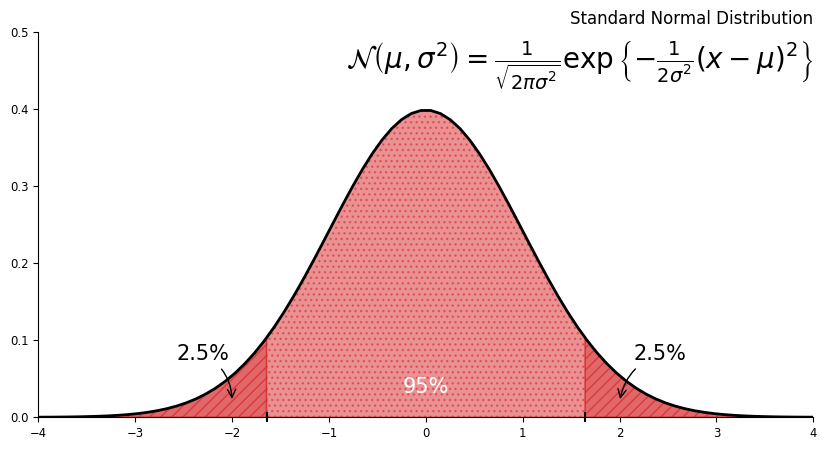

In [ ]:
####################################################
# 확률밀도함수 그림

x = np.linspace(-5, 5, 100)
p95interval = [normal_rv.ppf(0.05), normal_rv.ppf(0.95)]
p95interval_ = np.linspace(*p95interval, 100)
left_p95interval = np.linspace(-5, p95interval[0], 100)
right_p95interval = np.linspace(p95interval[1], 5, 100)

fig = plt.figure(figsize=(10, 5), dpi=100)
ax = plt.subplot(xlim=[-4, 4], ylim=[0.0, 0.5])

ax.plot(x, normal_rv.pdf(x), color='k', lw=2)

ax.fill_between(p95interval_, normal_rv.pdf(p95interval_), y2=0, color='C3', alpha=0.5, hatch='...')
ax.fill_between(left_p95interval, normal_rv.pdf(left_p95interval), y2=0, color='C3', alpha=0.7, hatch="///")
ax.fill_between(right_p95interval, normal_rv.pdf(right_p95interval), y2=0, color='C3', alpha=0.7, hatch="///")

ax.set_title("Standard Normal Distribution", x=1, weight="light", ha="right")
ax.text(1, 0.98,
    r"$\mathcal{N}\left(\mu, \sigma^2 \right) = \frac{1}{\sqrt{2\pi \sigma^2}} \exp \left\{  -\frac{1}{2 \sigma^2} (x- \mu)^2 \right\}$",
    va="top", transform=ax.transAxes, size=20,  ha="right",)

ax.text(0.5, 0.08,
    "95%", color='1.0',
    va="center", ha="center",
    transform=ax.transAxes, size=15)

ax.annotate("2.5%", (-2, 0.02),
            size=15, xytext=(-40, 30),
            textcoords="offset points",
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-0.3"),
        )

ax.annotate("2.5%", (2, 0.02),
            size=15, xytext=(10, 30),
            textcoords="offset points",
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.3")
        )


ax.scatter(p95interval, np.zeros(len(p95interval)), s=50, zorder=20,
           clip_on=False, # 축바깥으로 나가도 자르지 않기
           marker="|", facecolor="black", linewidth=1.5)

ax.tick_params(axis='x', labelsize="small")
ax.tick_params(axis='y', labelsize="small")


# left, bottom 축은 위치 조정
# ax.spines["left"].set_position(("data", -4.5))

# axes의 right, top 축 감추기
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.show()


In [ ]:
####################################################
# 누적 분포 함수, 실수 전체에 대해 정의

normal_rv.cdf(0), normal_rv.cdf(-1.96), normal_rv.cdf(1.96)

(0.5, 0.024997895148220435, 0.9750021048517795)

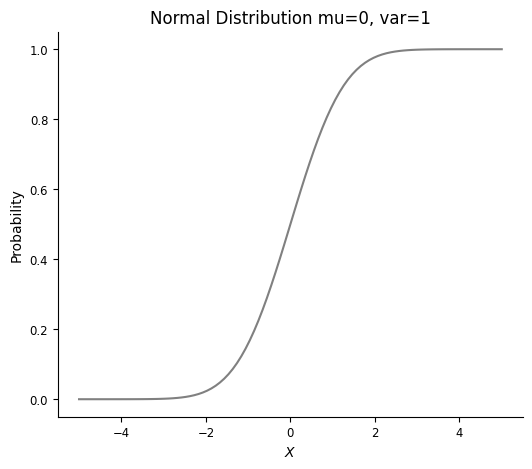

In [ ]:
####################################################
# 누적 분포 함수 그림

fig = plt.figure(figsize=(6,5), dpi=100)
ax = plt.axes()

ax.plot(x, normal_rv.cdf(x), color='0.5')
ax.set_xlabel(r"$X$")
ax.set_ylabel("Probability")
ax.set_title(r"Normal Distribution mu=0, var=1")

ax.tick_params(axis='x', labelsize="small")
ax.tick_params(axis='y', labelsize="small")

# axes의 right, top 축 감추기
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.show()

In [ ]:
####################################################
# 특정 누적 확률에 해당하는 확률 변수 값 구하기

normal_rv.ppf(0.7), normal_rv.isf(0.3)

(0.5244005127080407, 0.5244005127080409)

0.5244005127080407
0.5244005127080407


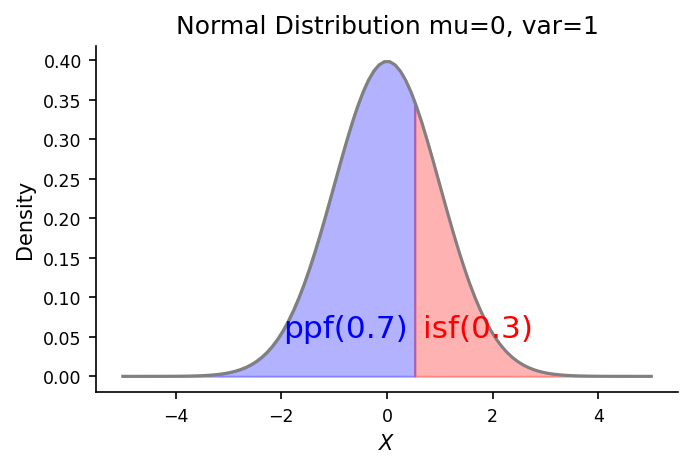

In [ ]:
####################################################
# ppf, isf 시각화

p = 0.7
print(normal_rv.ppf(p))
print(normal_rv.isf(1-p))

x_for_ppf  = np.linspace(-5, normal_rv.ppf(p), 100)
x_for_isf = np.linspace(normal_rv.isf(1-p), 5, 100)

fig = plt.figure(figsize=(5,3), dpi=150)
ax = plt.axes()

ax.plot(x, normal_rv.pdf(x), color='0.5')

ax.fill_between(x_for_ppf, normal_rv.pdf(x_for_ppf), color='b', alpha=0.3)
ax.text(normal_rv.ppf(p) - 2.5, p - 0.65, f'ppf({p})', fontsize=15, color='b')

ax.fill_between(x_for_isf, normal_rv.pdf(x_for_isf), color='r', alpha=0.3)
ax.text(normal_rv.isf(1-p)+0.15, p - 0.65, f'isf({1-p:.1f})', fontsize=15, color='r')

ax.set_xlabel(r"$X$")
ax.set_ylabel("Density")
ax.set_title(r"Normal Distribution mu=0, var=1")

ax.tick_params(axis='x', labelsize="small")
ax.tick_params(axis='y', labelsize="small")

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.show()

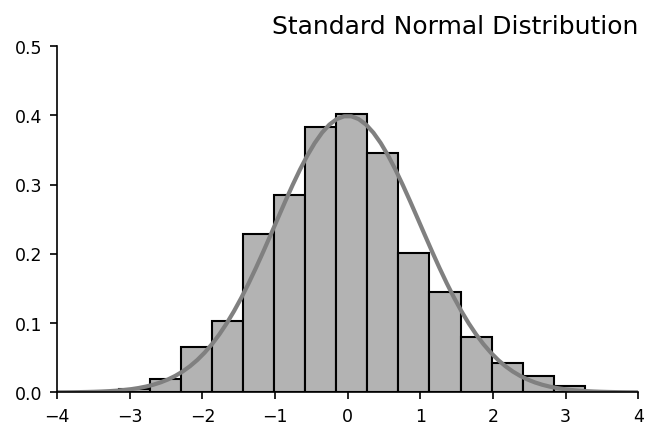

In [ ]:
####################################################
# 랜덤 샘플링 시뮬레이션

samples = normal_rv.rvs(size=500, random_state=111)

fig = plt.figure(figsize=(5,3), dpi=150)
ax = plt.axes()

x = np.linspace(-5, 5, 100)
p95interval = [normal_rv.ppf(0.05), normal_rv.ppf(0.95)]
p95interval_ = np.linspace(*p95interval, 100)
left_p95interval = np.linspace(-5, p95interval[0], 100)
right_p95interval = np.linspace(p95interval[1], 5, 100)

ax.set_xlim([-4, 4])
ax.set_ylim([0.0, 0.5])
ax.plot(x, normal_rv.pdf(x), color='0.5', lw=2)
ax.hist(samples, bins=15, density=True, color='0.7', edgecolor='k')
ax.set_title("Standard Normal Distribution", x=1, weight="light", ha="right")

ax.tick_params(axis='x', labelsize="small")
ax.tick_params(axis='y', labelsize="small")

# axes의 right, top 축 감추기
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.show()

#### 표준 정규분포로 표준화Standardization

In [ ]:
# 임의의 정규 분포
X = norm(loc=1.5, scale=0.5)

# 표준 정규 분포
Z = norm(loc=0, scale=1.0)

In [ ]:
# X에서 샘플 1000개 샘플링
x = X.rvs(1000)

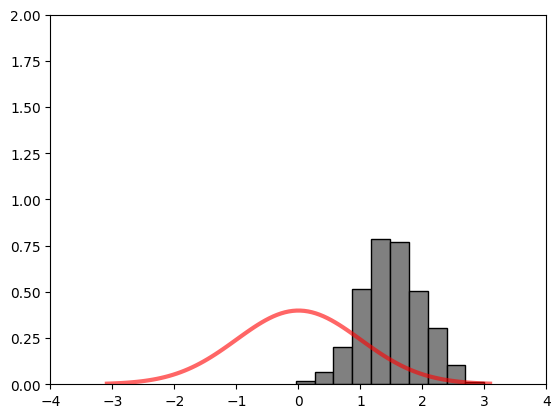

In [ ]:
x_ = np.linspace(Z.ppf(0.001), Z.ppf(0.999), 100)

# 표준 정규 분포 확률밀도함수 그리기
plt.plot(x_, Z.pdf(x_), 'r-', lw=3, alpha=0.6, label='norm pdf')

# x 히스토그램 그리기
plt.hist(x, ec='k', color='gray', density=True)

plt.xlim(-4, 4)
plt.ylim(0, 2)

plt.show()

In [ ]:
# 표준화
x_norm = (x - x.mean()) / x.std()

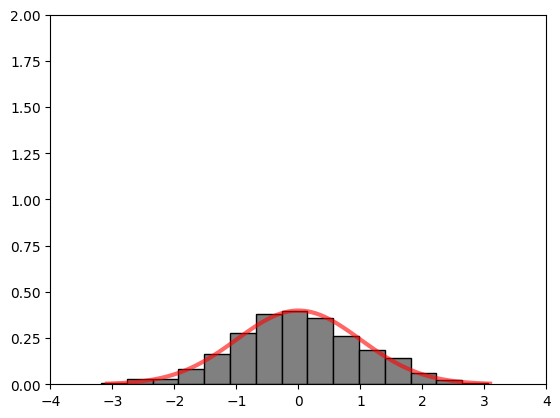

In [ ]:
plt.plot(x_, Z.pdf(x_), 'r-', lw=3, alpha=0.6, label='norm pdf')
plt.hist(x_norm, ec='k', color='gray', bins=15, density=True)
plt.xlim(-4, 4)
plt.ylim(0, 2)
plt.show()

#### 중심극한정리 Central Limit Theorem

- 확률 변수 $𝑋_1$, $𝑋_2$,…,$𝑋_𝑛$  이 서로 독립이고, 기댓값이 $𝜇$, 분산이 $𝜎^2$인 확률 분포 $𝐹$를 따를 때
- $𝑛$이 커짐에 따라 표본평균 $\bar{X}$의 분포는
- 정규분포 $𝑁(𝜇,\frac{𝜎^2}{𝑛})$에 가까워 진다.
- 원래 확률 분포 $𝐹$가 어떤 분포든 상관 없음 ($𝑛$이 대략 30보다 큰 경우)
- 원래 확률 분포 $𝐹$가 정규 분포라면 $𝑛$에 상관없이 성립

- https://onlinestatbook.com/stat_sim/sampling_dist/index.html

## 확률분포 계산 연습

- 평균 2, 표준편차가 3인 정규분포에서 x=1에서 확률밀도 함수 값을 계산하시오.

In [ ]:
X = norm(loc=2, scale=3)
X.pdf(1)

0.12579440923099774

- 평균이 0이고 표준편차가 2인 정규분포에서 P(X<=1)의 확률을 계산 하시오.

In [ ]:
X = norm(loc=0, scale=2)
X.cdf(1)

0.6914624612740131

- 평균이 0이고 표준편차가 1인 정규분포에서 하위 95% 확률에 대응하는 확률변수의 값을 계산하시오.

In [ ]:
X = norm(loc=0, scale=1)
X.ppf(0.95)

1.6448536269514722

- 평균이 0이고 표준편차가 1인 정규분포에서 상위 95% 확률에 대응하는 확률변수의 값을 계산하시오.

In [ ]:
X = norm(loc=0, scale=1)
X.isf(0.95)

-1.6448536269514722

- 평균 3, 분산이 4인 정규분포에서 X가 4.5보다 큰 값을 가질 확률을 계산하시오.

In [ ]:
X = norm(3, np.sqrt(4))
1 - X.cdf(4.5)

0.22662735237686826

## 추정과 검정에 쓰이는 연속 확률분포

### 카이 제곱 분포

In [ ]:
# 자유도 10인 카이제곱분포를 따르는 샘플 직접 계산
n = 10
Z = norm()

sample_size = 1000000
Zs = Z.rvs((n, sample_size))

chi2_sample = (Zs**2).sum(axis=0)

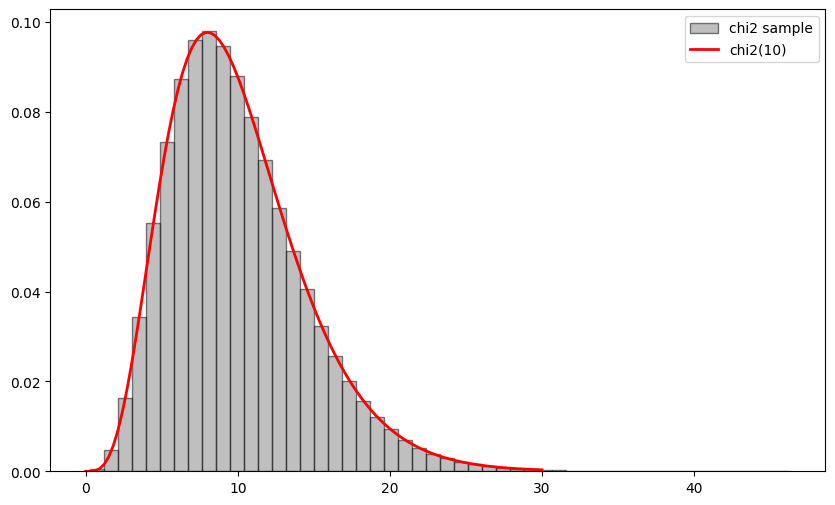

In [ ]:
# 직접 계산한 샘플의 히스토그램과 확률밀도 함수를 비교
from scipy.stats import chi2



fig = plt.figure(figsize=(10,6))
ax = plt.axes()

chi2_true = chi2(n)
x = np.linspace(0, 30, 100)
ax.hist(chi2_sample, bins=50, ec='k', density=True, color='0.5', alpha=0.5, label='chi2 sample')
ax.plot(x, chi2_true.pdf(x), lw=2, color='r', label=f'chi2({n})')
ax.legend()
plt.show()

- 앞 확률 분포에서 소개한 scipy함수를 사용하여 다음 연습을 직접 수행하시오

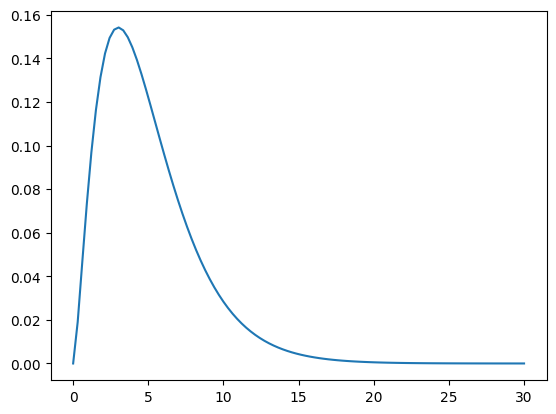

In [ ]:
# 자유도가 5인 카이제곱 분포 확률밀도 함수 그리기
chi2_rv = chi2(5)

x = np.linspace(0, 30, 100)
plt.plot(x, chi2_rv.pdf(x))
plt.show()

In [ ]:
# P(1<=X<=3) 계산하기
chi2_rv.cdf(3) - chi2_rv.cdf(1)

0.2625799373686688

In [ ]:
# 자유도가 5인 카이제곱분포를 따르는 확률변수에서
# 나올 수 있는 값 중 상위 5%에 해당하는 값을 계산하시오.
chi2_rv.ppf(0.95), chi2_rv.isf(0.05)

(11.070497693516351, 11.070497693516355)

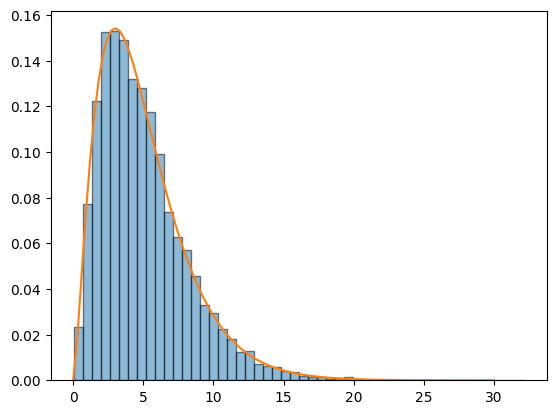

In [ ]:
# 표준 정규분포를 따르는 확률변수 5개로 이뤄진 표본 1만개를 만들고
# 표본에 들어있는 5개 확률변수 값을 모두 제곱해서 더하여 히스토그램을
# 그리고 1에서 그린 그래프와 겹쳐 그려보시오.
X = norm(0, 1)
sample = X.rvs((10000, 5))
Y = (sample**2).sum(axis=1)

plt.hist(Y, bins=50, ec='k', density=True, alpha=0.5)
plt.plot(x, chi2_rv.pdf(x));

### t 분포

In [ ]:
# 자유도 10인 t분포를 따르는 샘플 직접 계산
n = 10
Z = norm()
Y = chi2(n)

sample_size = 1000000
Z_sample = Z.rvs(sample_size)
Y_sample = Y.rvs(sample_size)

t_sample = Z_sample / np.sqrt(Y_sample/n)

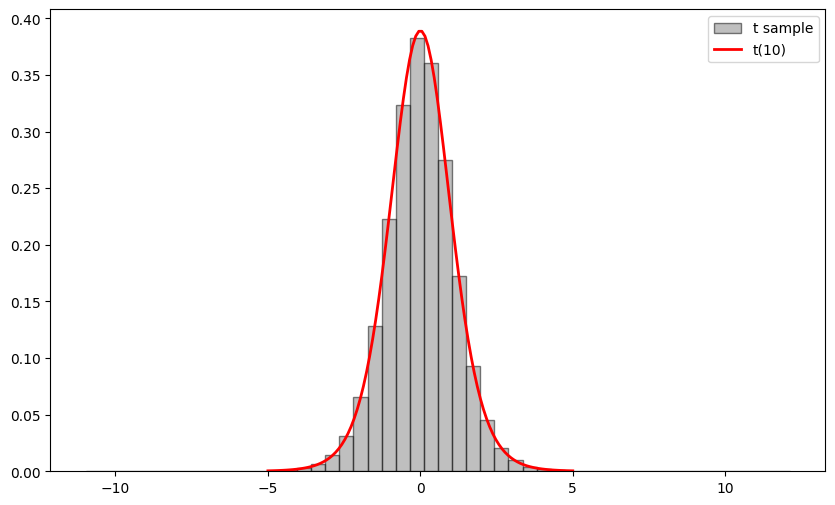

In [ ]:
# 직접 계산한 샘플의 히스토그램과 확률밀도 함수를 비교
from scipy.stats import t



fig = plt.figure(figsize=(10,6))
ax = plt.axes()

t_true = t(n)
x = np.linspace(-5, 5, 100)
ax.hist(t_sample, bins=50, ec='k', density=True, color='0.5', alpha=0.5, label='t sample')
ax.plot(x, t_true.pdf(x), lw=2, color='r', label=f't({n})')
ax.legend()
plt.show()

- 앞 확률 분포에서 소개한 scipy함수를 사용하여 다음 연습을 직접 수행하시오

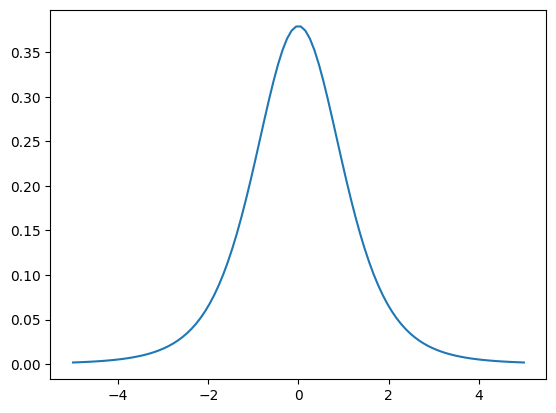

In [ ]:
# 자유도가 5인 t 분포 확률밀도 함수 그리기
t_rv = t(5)

x = np.linspace(-5, 5, 100)
plt.plot(x, t_rv.pdf(x))
plt.show()

In [ ]:
# P(-1 <= X <= 2) 계산하기
t_rv.cdf(2) - t_rv.cdf(-1)

0.7674215267605096

In [ ]:
# 자유도가 5인 t 분포를 따르는 확률변수에서
# 나올 수 있는 값 중 상위 5%에 해당하는 값을 계산하시오.
t_rv = t(5)
t_rv.ppf(0.95), t_rv.isf(0.05)

(2.015048372669157, 2.0150483726691575)

### F 분포

In [ ]:
# 자유도 n1=5, n2=10인 F분포를 따르는 샘플 직접 계산
n1 = 5
n2 = 10
Y1 = chi2(n1)
Y2 = chi2(n2)

sample_size = 1000000
Y1_sample = Y1.rvs(sample_size)
Y2_sample = Y2.rvs(sample_size)

f_sample = (Y1_sample/n1) / (Y2_sample/n2)

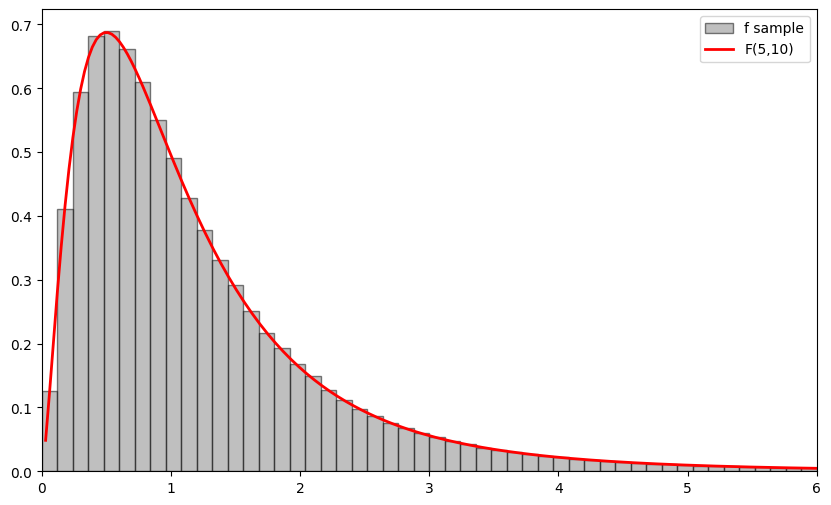

In [ ]:
# 직접 계산한 샘플의 히스토그램과 확률밀도 함수를 비교
from scipy.stats import f

fig = plt.figure(figsize=(10,6))
ax = plt.axes()

f_true = f(n1, n2)
x = np.linspace(0, 6, 200)[1:] # 0 제외 주의!
ax.hist(f_sample, bins=50, range=(0,6), ec='k', density=True,
        color='0.5', alpha=0.5, label='f sample')
ax.plot(x, f_true.pdf(x), lw=2, color='r', label=f'F({n1},{n2})')
ax.set_xlim(0,6)
ax.legend()
plt.show()